# MNIST Autoencoder

* I created autoencoders described below and played with the topology
* I normalized the data and used the Functional API for Keras

### Autoencoders to build
1. Stacked 784 - 392 - 196 - 392 - 784 (tied weights)
2. Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)
   

In [ ]:
#!pip install --upgrade tensorflow

In [11]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.datasets import mnist


In [12]:
# MNIST data
(X_train, _), (X_test, _) = mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape


(70000, 28, 28)

In [13]:
# Normalize the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshape the data
X_train_flattened = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test_flattened = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


In [14]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])




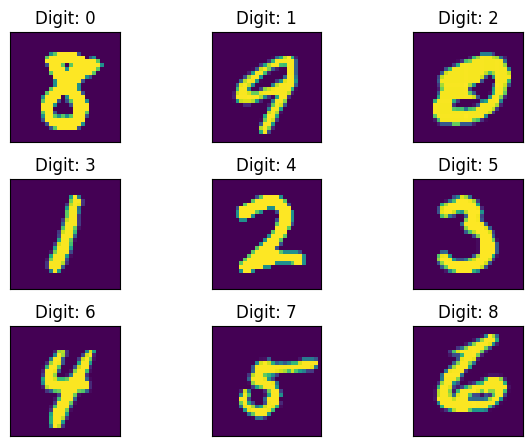

In [15]:
print_first_9(all_data[-9:])

In [16]:
# Build the stacked autoencoder

input_img = layers.Input(shape=(784,))
encoded = layers.Dense(392, activation='relu')(input_img)
encoded = layers.Dense(196, activation='relu')(encoded)

decoded = layers.Dense(392, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [17]:

# Train the stacked autoencoder
autoencoder.fit(X_train_flattened, X_train_flattened,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_flattened, X_test_flattened))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.1730 - val_loss: 0.1015
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0936 - val_loss: 0.0855
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0832 - val_loss: 0.0799
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0788 - val_loss: 0.0764
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0760 - val_loss: 0.0741
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0741 - val_loss: 0.0727
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0728 - val_loss: 0.0723
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0719 - val_loss: 0.0711
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0710 - val_loss: 0.0702
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0704 - val_loss: 0.0700

In [18]:
# Evaluate the stacked autoencoder
decoded_imgs = autoencoder.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [26]:
# Calculate the Mean Squared Error for the stacked autoencoder
mse_stacked = np.mean(np.square(X_test_flattened - decoded_imgs))
print(f"Mean Squared Error for Stacked Autoencoder: {mse_stacked}")

Mean Squared Error for Stacked Autoencoder: 0.0014971450436860323


Original images:


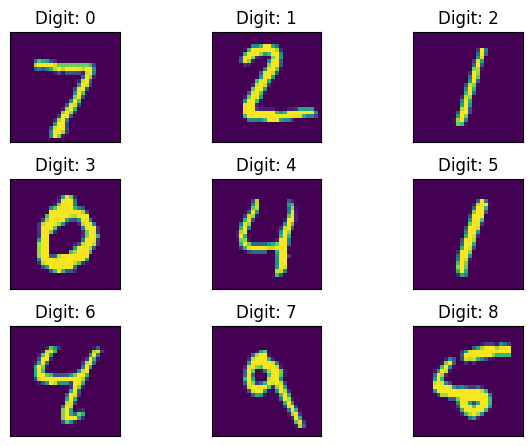

In [19]:
# Print 10 inputs and associated outputs
print("Original images:")
print_first_9(X_test[:9].reshape(9, 28, 28))

Reconstructed images:


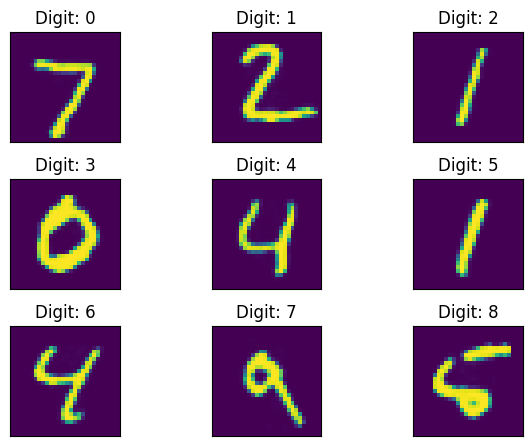

In [20]:
print("Reconstructed images:")
print_first_9(decoded_imgs[:9].reshape(9, 28, 28))

In [21]:
# Build the convolutional autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [22]:

conv_autoencoder = models.Model(input_img, decoded)

conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Reshape the data for the convolutional autoencoder
X_train_reshaped = X_train.reshape((len(X_train), 28, 28, 1))
X_test_reshaped = X_test.reshape((len(X_test), 28, 28, 1))

# Train the convolutional autoencoder
conv_autoencoder.fit(X_train_reshaped, X_train_reshaped,
                     epochs=50,
                     batch_size=256,
                     shuffle=True,
                     validation_data=(X_test_reshaped, X_test_reshaped))

Epoch 1/50
235/235 [==============================] - 8s 14ms/step - loss: 0.1999 - val_loss: 0.1197
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1107 - val_loss: 0.1024
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0999 - val_loss: 0.0958
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0945 - val_loss: 0.0920
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0909 - val_loss: 0.0884
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0882 - val_loss: 0.0875
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0863 - val_loss: 0.0842
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0847 - val_loss: 0.0831
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0836 - val_loss: 0.0823
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0825 - val_lo

In [23]:

# Evaluate the convolutional autoencoder
decoded_imgs_conv = conv_autoencoder.predict(X_test_reshaped)

313/313 [==============================] - 1s 2ms/step


In [27]:
# Calculate the Mean Squared Error for the convolutional autoencoder
mse_conv = np.mean(np.square(X_test_reshaped - decoded_imgs_conv))
print(f"Mean Squared Error for Convolutional Autoencoder: {mse_conv}")


Mean Squared Error for Convolutional Autoencoder: 0.00379872415214777


Original images:


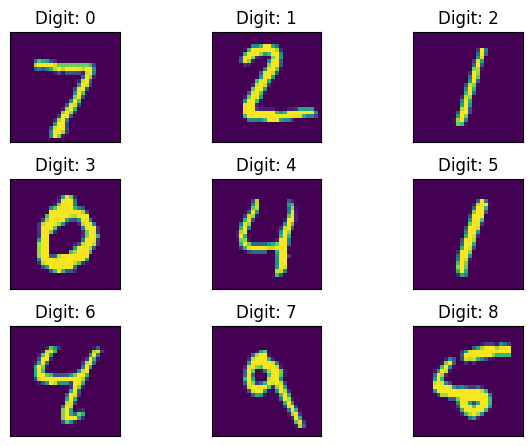

In [24]:
# Print 10 inputs and associated outputs for convolutional autoencoder
print("Original images:")
print_first_9(X_test_reshaped[:9].reshape(9, 28, 28))

Reconstructed images:


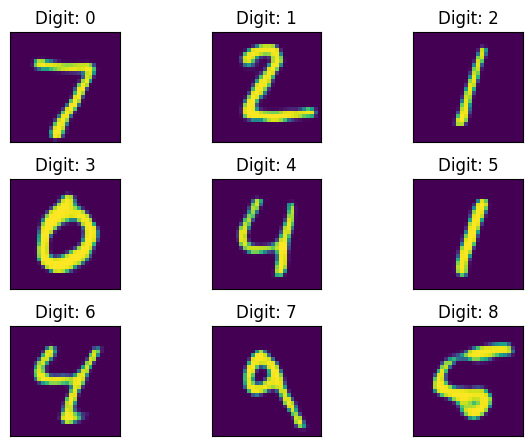

In [25]:
print("Reconstructed images:")
print_first_9(decoded_imgs_conv[:9].reshape(9, 28, 28))
